## Abdulkadir Nafisat Task 1 for Grip
In this section we will use the Python Scikit-Learn library for machine learning in predicting the percentage of a student based on the number of study hours they put in studying. Using a simple linear regression model considering two(2) variables.

In [ ]:
# we import all relevant libraries needed for this work
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [29]:
# we now read the data via a url
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Succesful")
#visualize the data
data.head(10)

Succesful


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.shape

(25, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


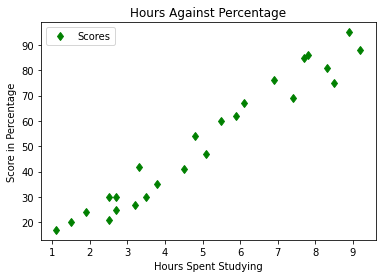

In [ ]:
# we plot the distribution of Hours Against Score
data.plot(x='Hours', y='Scores', style='d', color='g');  
plt.title('Hours Against Percentage')  
plt.xlabel('Hours Spent Studying')  
plt.ylabel('Score in Percentage')  
plt.show()

The Visualization shows a clear correlation between the Scores and the time spent Studying.

We select our inut Variable and our taget Variable.

In [ ]:
#X=data.drop(['Scores'], axis=1)
#y=data['Scores']
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

We now split our dataset into training and test data.

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0) 

We define our Model of Interest

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


Her we will plot the line of Regression

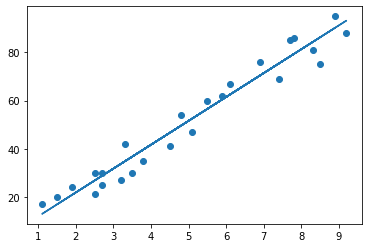

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Having Trained the Dataset we will now Make some Predictions

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


We now check for the Accuracy of the Model

In [ ]:
regressor.score(X_test,y_test) * 100

94.54906892105353

We fit the Model to help us predict a singular data

In [ ]:
regressor.fit(X_test.reshape(-1, 1), y_test)

LinearRegression()

We now Predict our variable

In [ ]:

hours = 9.25
#hours.reshape(1,-1)
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 87.2409727947238
